<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

# Loading packages

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Creating Dataset

In [2]:
X, y = datasets.make_circles(n_samples=1500, factor=.5, noise=.05, random_state=42)

In [3]:
X = StandardScaler().fit_transform(X)

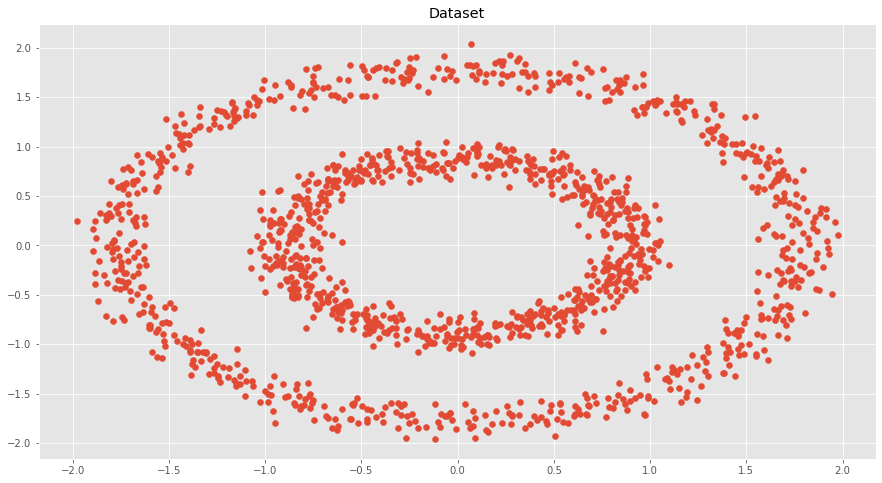

In [4]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.scatter(X[:,0], X[:,1])
plt.title("Dataset")
plt.show()

# DBSCAN Algorithm

In [5]:
dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')

In [6]:
dbscan.fit(X)

DBSCAN(eps=0.2)

In [7]:
np.unique(dbscan.labels_)

array([0, 1])

In [8]:
Counter(dbscan.labels_)

Counter({0: 750, 1: 750})

# Choosing different min points and deducing epsilon by elbow method

In [9]:
range_min_pts = np.linspace(2, 6, 5)
range_min_pts

array([2., 3., 4., 5., 6.])

Clusters with pts: Counter({1: 750, 0: 750})


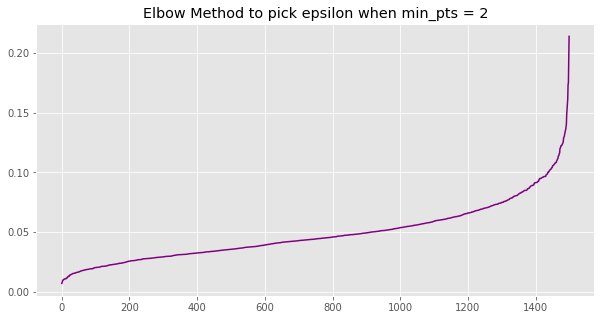

------------------------------------------------------------------------------------
Clusters with pts: Counter({1: 750, 0: 750})


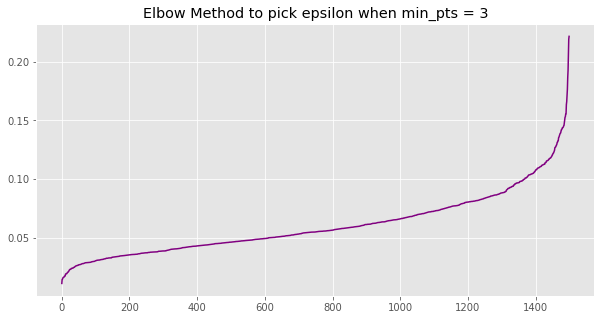

------------------------------------------------------------------------------------
Clusters with pts: Counter({1: 750, 0: 750})


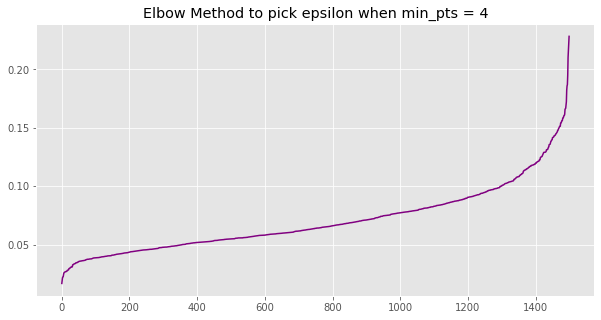

------------------------------------------------------------------------------------
Clusters with pts: Counter({1: 750, 0: 750})


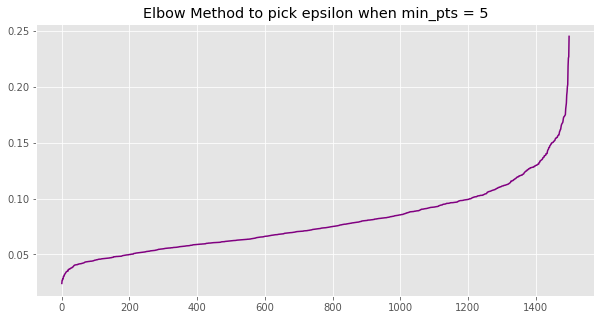

------------------------------------------------------------------------------------
Clusters with pts: Counter({1: 750, 0: 750})


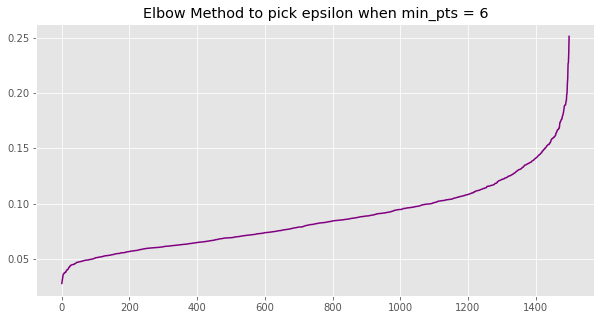

------------------------------------------------------------------------------------


In [10]:
min_points_num = []
epsilons = []

for min_pts in range_min_pts:

    min_pts = int(min_pts)
    knn = KNeighborsClassifier(n_neighbors=min_pts + 1)
    knn.fit(X, y)
    print('Clusters with pts:', Counter(knn.predict(X)))

    distances, neighbours = knn.kneighbors(X)

    dist = sorted(distances[:,-1])
    indices = list(range(len(dist)))

    plt.style.use('ggplot')
    plt.figure(figsize=(10,5))
    plt.plot(indices, dist, color='purple')
    plt.title(f'Elbow Method to pick epsilon when min_pts = {min_pts}')
    plt.show()

    covered_pts = 1450
    epsilon = dist[covered_pts]

    min_points_num.append(min_pts)
    epsilons.append(epsilon)
    print('------------------------------------------------------------------------------------')

# Trying each pair of epsilon and min_pts

In [11]:
for min_p, eps in zip(min_points_num, epsilons):

    dbscan = DBSCAN(eps=eps.round(3), min_samples=min_p, metric='euclidean')
    dbscan.fit(X)
    print(f'Epsilon: {eps.round(3)}, Min_pts: {min_p}, Clusters: {Counter(dbscan.labels_)}')

Epsilon: 0.105, Min_pts: 2, Clusters: Counter({0: 744, 1: 285, 2: 157, 3: 144, 4: 77, 5: 54, -1: 18, 6: 17, 7: 2, 8: 2})
Epsilon: 0.121, Min_pts: 3, Clusters: Counter({0: 747, 1: 487, 2: 236, 3: 17, -1: 13})
Epsilon: 0.142, Min_pts: 4, Clusters: Counter({0: 750, 1: 747, -1: 3})
Epsilon: 0.15, Min_pts: 5, Clusters: Counter({0: 750, 1: 747, -1: 3})
Epsilon: 0.159, Min_pts: 6, Clusters: Counter({0: 750, 1: 747, -1: 3})


## Last three trials give the same results and lowest number of clusters which are acceptable results. So, We can choose **epsilon=0.15** and **min_pts=5**

In [12]:
dbscan = DBSCAN(eps=0.15, min_samples=5, metric='euclidean')

In [13]:
dbscan.fit(X)

DBSCAN(eps=0.15)

In [14]:
X[dbscan.labels_ == -1].shape

(3, 2)

In [15]:
X[~(dbscan.labels_ == -1)].shape

(1497, 2)

## To test silhouette score, you must exclude noise points

In [16]:
feats = X[~(dbscan.labels_ == -1)]
labels = dbscan.labels_[~(dbscan.labels_ == -1)]

In [17]:
silhouette_score(feats, labels)

0.11317118436217412

# Visualizing Clusters

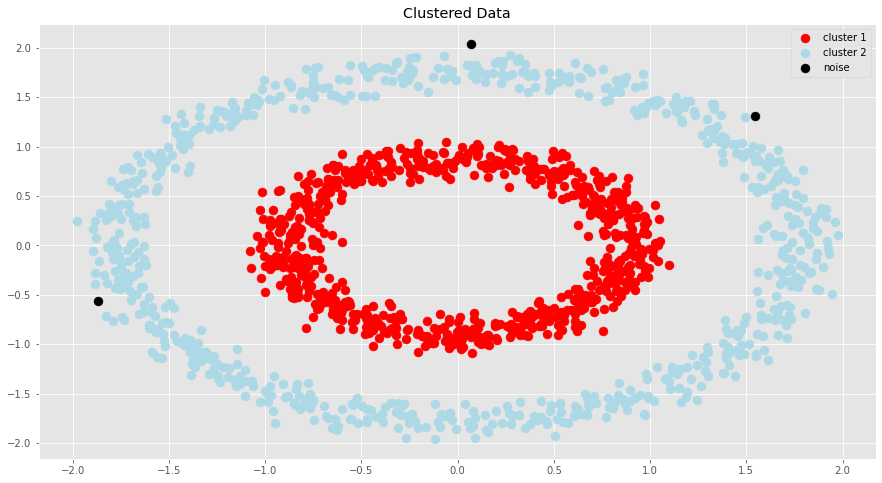

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))

for c in [0, 1, -1]:
    target_feat = X[dbscan.labels_ == c]
    if c == 0:
        label = 'cluster 1'
        col = 'red'
    elif c == 1:
        label = 'cluster 2'
        col = 'lightblue'
    else:
        label = 'noise'
        col = 'black'
    plt.scatter(target_feat[:,0], target_feat[:,1], label=label, c=col, s=80)
    plt.legend(loc=('upper right'))
    plt.title('Clustered Data')